# Lab Instructions

You are working as an analyst for a consulting agency that has been hired to study and improve productivity at a mid-sized company.  Morale is very low and, after speaking with employees, several common complaints kept coming up:

* New employees complained that more tenured employees were lazy and unproductive.
* More tenured employees complained that the newer employees didn't focus and were therefore unproductive.
* Managers were worried that remote workers might be less productive.
* In-person employees found it impossible to focus and be productive when their desk was in the open plan area.
* Many people said they had so much administrative work to do they could only be truly productive if they worked overtime.
* Everyone complained that there were too many meetings.

The consulting agency carefully collected data on a number of factors including number of years at the company, focus (higher is better), productivity (higher is better), department, meetings per week, and desk location can be found in Employee_productivity.csv.

1. Determine which feature - years at the company, hours worked, or focus - has the strongest linear relationship with productivity.  Show a visualization and calculate R-squared for all three relationships to justify your answer.

2. Build on that linear regression model to determine what other featuers also impact productivity. Using both visualzations and R-squared values, build a model that can predicts employee productivity at this company. Evaluate each feature in the dataset.

3. Write a short (a few sentences) summary of how the different factors in the data relate to employee productivity.  What recommendations would you make so that employees can be as productive as possible?

**For the purposes of this lab you MUST use the model building techniques we covered in class.  Failure to do so will automatically result in a 20 point deduction.  I really want you to think about what you are doing and not just paste what you get from ChatGPT (which will often NOT do the correct thing by default).**



In [23]:
#1. regression models with years at company, hours worked and focus
#2. use hue= to further the regression model
#3. summarize this info.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('Employee_productivity.csv')
df.head(10)


,HoursWorked,FocusScore,ProductivityScore,Department,YearsAtCompany,TeamMeetingsPerWeek,DeskLocation
0,42.4,6.3,3127.96,Engineering,17,0,Open Plan
1,34.0,7.2,4742.60,HR,8,6,Private Office
2,47.2,5.6,2044.73,Sales,15,3,Remote
3,38.4,9.0,5818.92,HR,5,6,Private Office
4,36.4,2.5,1841.31,Sales,9,6,Remote
5,44.4,4.0,2385.25,Sales,20,3,Open Plan
6,44.3,7.1,3888.09,Sales,8,4,Open Plan
7,36.8,5.4,2077.97,Engineering,4,3,Open Plan
8,40.1,4.5,2404.92,Marketing,15,5,Open Plan
9,28.8,2.3,784.88,Engineering,4,3,Private Office


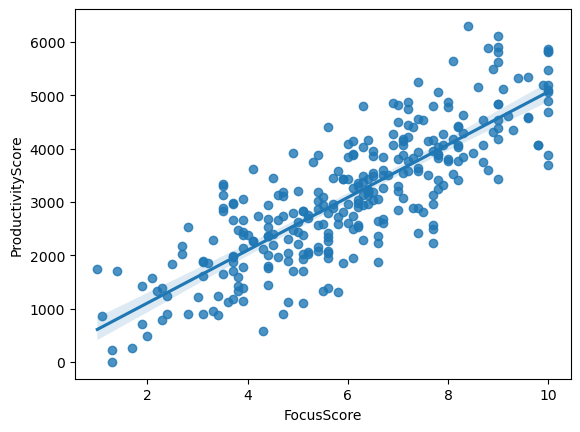

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     626.6
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           3.02e-75
Time:                        14:01:46   Log-Likelihood:                -2394.3
No. Observations:                 300   AIC:                             4793.
Df Residuals:                     298   BIC:                             4800.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        114.3813    126.657      0.903      0.367    -134.874     363.636
FocusScore   494.9319     19.772     25.032      0.000     456.021     533.843
==============================================================================
Omnibus:                        0.756   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.869
Skew:                           0.076   Prob(JB):                        0.648
Kurtosis:                       2.784   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:

sns.regplot(x='FocusScore',y='ProductivityScore',data=df)
plt.show()
x = sm.add_constant(df['FocusScore'])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

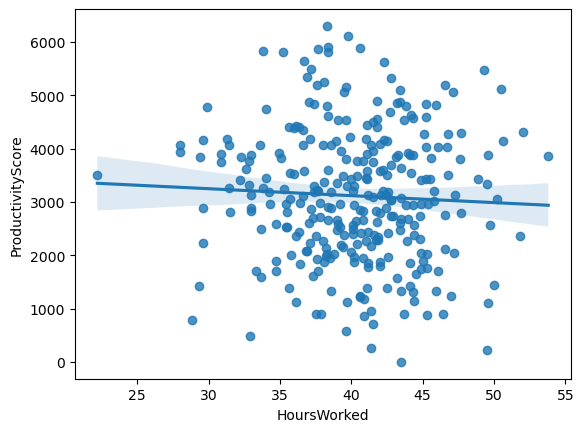

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7768
Date:                Fri, 14 Nov 2025   Prob (F-statistic):              0.379
Time:                        14:03:09   Log-Likelihood:                -2563.7
No. Observations:                 300   AIC:                             5131.
Df Residuals:                     298   BIC:                             5139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3638.4153    599.175      6.072      0.000    2459.265    4817.566
HoursWorked   -13.0329     14.787     -0.881      0.379     -42.133      16.068
==============================================================================
Omnibus:                        2.775   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.335
Skew:                           0.104   Prob(JB):                        0.311
Kurtosis:                       2.621   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
sns.regplot(x='HoursWorked',y='ProductivityScore',data=df)
plt.show()
x = sm.add_constant(df['HoursWorked'])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

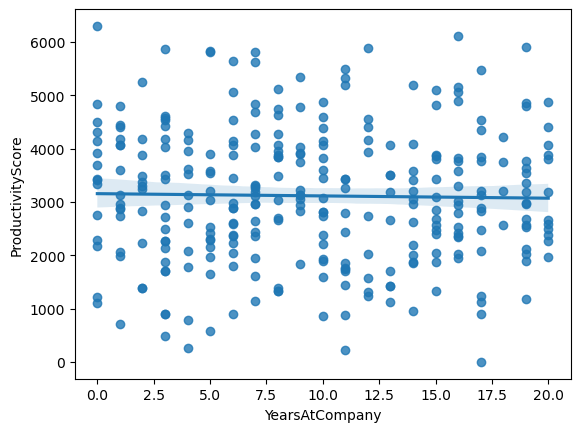

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1227
Date:                Fri, 14 Nov 2025   Prob (F-statistic):              0.726
Time:                        14:12:28   Log-Likelihood:                -2564.1
No. Observations:                 300   AIC:                             5132.
Df Residuals:                     298   BIC:                             5140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3154.6734    136.338     23.139      0.000    2886.366    3422.981
YearsAtCompany    -4.2493     12.132     -0.350      0.726     -28.124      19.625
==============================================================================
Omnibus:                        2.338   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.311   Jarque-Bera (JB):                2.025
Skew:                           0.091   Prob(JB):                        0.363
Kurtosis:                       2.641   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
sns.regplot(x='YearsAtCompany',y='ProductivityScore',data=df)
plt.show()
x = sm.add_constant(df['YearsAtCompany'])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

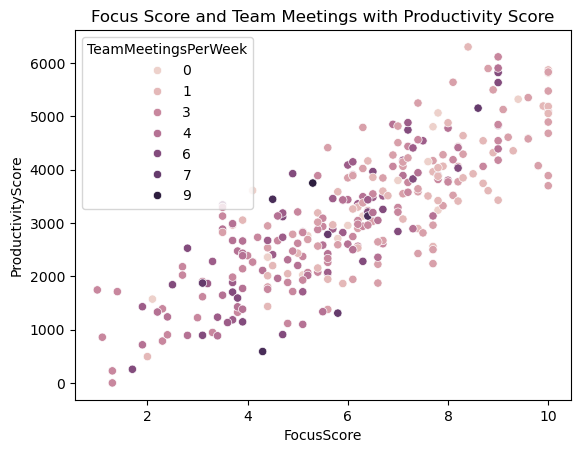

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     313.3
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           6.79e-74
Time:                        14:47:13   Log-Likelihood:                -2393.9
No. Observations:                 300   AIC:                             4794.
Df Residuals:                     297   BIC:                             4805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.3955    170.207      0.126      0.900    -313.570     356.361
FocusScore            500.2857     20.837     24.010      0.000     459.279     541.292
TeamMeetingsPerWeek    20.1564     24.630      0.818      0.414     -28.316      68.629
==============================================================================
Omnibus:                        0.419   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.547
Skew:                           0.063   Prob(JB):                        0.761
Kurtosis:                       2.832   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
sns.scatterplot(x='FocusScore',y='ProductivityScore',hue='TeamMeetingsPerWeek',data=df)
plt.title('Focus Score and Team Meetings with Productivity Score')
plt.show()
x = sm.add_constant(df[['FocusScore', 'TeamMeetingsPerWeek' ]])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

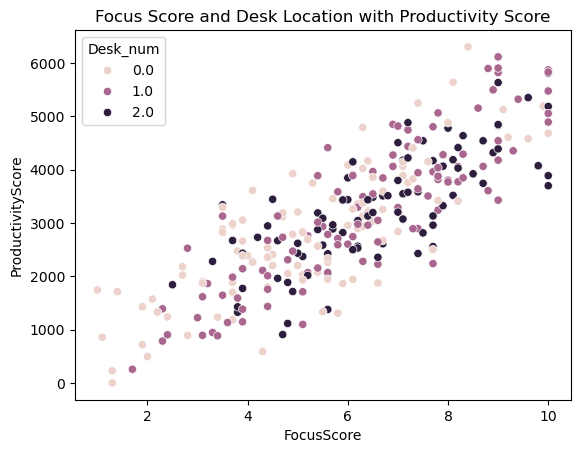

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     318.3
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           1.35e-74
Time:                        14:42:58   Log-Likelihood:                -2392.3
No. Observations:                 300   AIC:                             4791.
Df Residuals:                     297   BIC:                             4802.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        156.0322    127.784      1.221      0.223     -95.445     407.510
FocusScore   504.4458     20.254     24.906      0.000     464.586     544.306
Desk_num    -103.8129     52.434     -1.980      0.049    -207.003      -0.623
==============================================================================
Omnibus:                        0.628   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.737
Skew:                           0.039   Prob(JB):                        0.692
Kurtosis:                       2.770   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
df.loc[df['DeskLocation'] == 'Open Plan', 'Desk_num'] = 0
df.loc[df['DeskLocation'] == 'Private Office', 'Desk_num'] = 1
df.loc[df['DeskLocation'] == 'Remote', 'Desk_num'] = 2

sns.scatterplot(x='FocusScore',y='ProductivityScore',hue='Desk_num',data=df)
plt.title('Focus Score and Desk Location with Productivity Score')
plt.show()
x = sm.add_constant(df[['FocusScore', 'Desk_num' ]])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

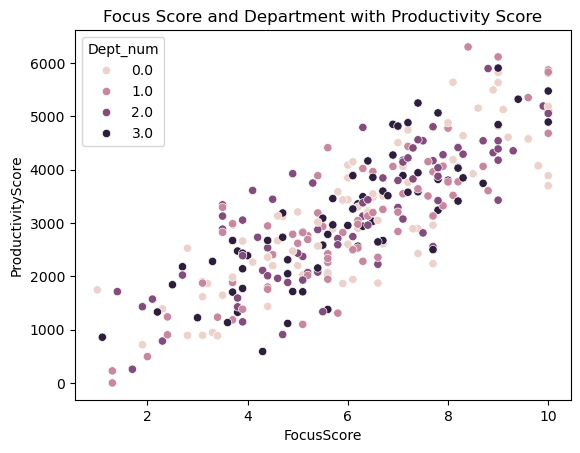

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ProductivityScore   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     312.7
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           8.30e-74
Time:                        15:03:47   Log-Likelihood:                -2394.1
No. Observations:                 300   AIC:                             4794.
Df Residuals:                     297   BIC:                             4805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0748    138.860      0.613      0.541    -188.199     358.349
FocusScore   495.1881     19.803     25.006      0.000     456.217     534.159
Dept_num      18.8800     36.447      0.518      0.605     -52.846      90.606
==============================================================================
Omnibus:                        0.771   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.680   Jarque-Bera (JB):                0.884
Skew:                           0.079   Prob(JB):                        0.643
Kurtosis:                       2.787   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
df.loc[df['Department'] == 'HR', 'Dept_num'] = 0
df.loc[df['Department'] == 'Marketing', 'Dept_num'] = 1
df.loc[df['Department'] == 'Engineering', 'Dept_num'] = 2
df.loc[df['Department'] == 'Sales', 'Dept_num'] = 3

sns.scatterplot(x='FocusScore',y='ProductivityScore',hue='Dept_num',data=df)
plt.title('Focus Score and Department with Productivity Score')
plt.show()
x = sm.add_constant(df[['FocusScore', 'Dept_num' ]])
y = df['ProductivityScore']

model = sm.OLS(y,x).fit()

model.summary()

The factors that relate the most to the productivity score was the focus score with an r-score of .678. To further this relationship factoring in other columns the Desk Location section add to the r-score to make it .682. The reccomendation I would make would be to try and offer the open office people private offices or remote to increase productivity.